In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import itertools

%matplotlib inline

In [53]:
def build_matrix(shape):
    m = np.zeros(shape, dtype=int)
    m[0,0] = 1
    m = m.ravel()
    m = color(m)
    m = m.reshape(shape)
    show(m)
    
    
def color(m):
    for i in range(1, m.size):
        if m[i-1] == 1:
            if np.random.rand() < 0.95:
                m[i] = 1
        elif np.random.rand() < 0.01:
            m[i] = 1
    return m


def show(m):
    fig, ax = plt.subplots(1, 1, figsize=(8,2))
    ax.imshow(m)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig("test.pdf")
    return fig

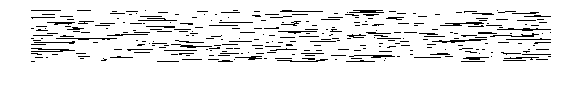

In [54]:
build_matrix((100, 1000))

In [51]:
def build_matrix(shape, n):
    m = np.zeros(shape, dtype=float)
    #m[0,0] = 1
    #m = m.ravel()
    m = color(m, n)
    m = m.reshape(shape)
    show(m)
    
    
def color(m, n):
    levels = np.arange(0.1, 1, 0.2)
    for i in range(n):
        m[np.random.choice(m.shape[0]), np.random.choice(m.shape[1])] = np.random.choice(levels)
    for _ in range(30):
        for x, y in zip(*np.where(m != 0)):
            try:
                if not np.all(m[np.ix_([x-1, x+2], [y-1, y+2])] == m[x,y]):
                
                    for xx in range(x-1, x+2):
                        for yy in range(y-1, y+2):
                            if m[xx, yy] != 1 and np.random.rand() < 0.15:
                                m[xx, yy] = m[x,y]
                        
            except IndexError:
                pass
    return m


def show(m):
    fig, ax = plt.subplots(1, 1, figsize=(8,2))
    ax.imshow(m, cmap=colors.ListedColormap(['white'] + sns.color_palette('Set2')))
    ax.axis('off')
    plt.tight_layout()
    plt.savefig("test.pdf")
    return fig

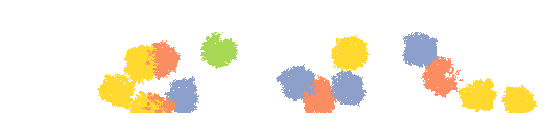

In [52]:
build_matrix((100, 500), 20)

In [44]:
def build_matrix(shape, n):
    m = np.zeros(shape, dtype=float)
    m = color(m, n)
    m = m.reshape(shape)
    show(m)
    
    
def color(m, n):
    levels = np.arange(0.1, 1, 0.1)
    for i in range(n):
        m[np.random.choice(m.shape[0]), np.random.choice(m.shape[1])] = np.random.choice(levels)
    
    for x, y in zip(*np.where(m != 0)):
        xx = x
        yy = y
        x_rand, y_rand = np.random.choice(levels), np.random.choice(levels)
        try:
            
            
            for _ in range(500):
#                 xx = np.random.choice(range(xx-1, xx+2))
#                 yy = np.random.choice(range(yy-1, yy+2))
                xx += 1 if np.random.rand() < x_rand else -1
                yy += 1 if np.random.rand() < y_rand else -1
                
                for i, j in itertools.product(range(xx-1, xx+2), range(yy-1, yy+2)):
                    m[i, j] = m[x,y]       
                
        except IndexError:
            pass
    return m


def show(m):
    fig, ax = plt.subplots(1, 1, figsize=(8, 2))
    ax.imshow(m, cmap=colors.ListedColormap(['white'] + sns.color_palette('Set2')))
    #sns.heatmap(m, ax=ax, cmap=colors.ListedColormap(['white'] + sns.color_palette('Set2')), cbar=False)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig("test.png")
    return fig

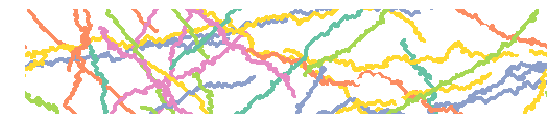

In [48]:
build_matrix((100, 500), 25)